In [1]:
import j_py_sad_correlation as jps
vars(jps)

{'__name__': 'j_py_sad_correlation',
 '__doc__': '',
 '__package__': '',
 '__loader__': <_frozen_importlib_external.ExtensionFileLoader at 0x1a6997b01f0>,
 '__spec__': ModuleSpec(name='j_py_sad_correlation', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x000001A6997B01F0>, origin='c:\\Users\\kross\\anaconda3\\envs\\open-optical-gating\\lib\\site-packages\\j_py_sad_correlation.cp39-win_amd64.pyd'),
 'sad_correlation': <function j_py_sad_correlation.sad_correlation>,
 'ssd_correlation': <function j_py_sad_correlation.ssd_correlation>,
 'sad_with_references': <function j_py_sad_correlation.sad_with_references>,
 'sad_grid': <function j_py_sad_correlation.sad_grid>,
 '__file__': 'c:\\Users\\kross\\anaconda3\\envs\\open-optical-gating\\lib\\site-packages\\j_py_sad_correlation.cp39-win_amd64.pyd'}

In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger
from classes.drawer import Drawer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf

In [ ]:
def u_fitting(y_1, y_2, y_3):
    # Fit using a symmetric 'U' function, to find the interpolated minimum for three datapoints y_1, y_2, y_3,
    # which are considered to be at coordinates x=-1, x=0 and x=+1
    c = y_2
    a = (y_1 + y_3 - 2*y_2) / 2
    b = y_3 - a - c
    x = -b / (2*a)
    y = a*x**2 + b*x + c
    return x, y, a, b, c

In [124]:
v = Drawer(10, 39.1, (196, 196))
v.generate_reference_sequence()
v.generate_sequence()

In [111]:
class BOGC(BOG):
    def __init__(self) -> None:
        super().__init__()

    def get_bias_correction(self):
        self.logger.print_message("DEBUG", "Beginning bias correction")

        self.I_0s = []
        self.I_1s = []
        self.I_2s = []
        for f in range(1, self.reference_sequence.shape[0] - 1):
            I_0_pixels = []
            I_1_pixels = []
            I_2_pixels = []
            for x in range(self.reference_sequence.shape[1]):
                for y in range(self.reference_sequence.shape[2]):
                    seq_1 = self.reference_sequence[f - 1,x,y]
                    seq_2 = self.reference_sequence[f,x,y]
                    seq_3 = self.reference_sequence[f + 1,x,y]
                    I_0 = seq_2
                    I_2 = (seq_1 + seq_3 - 2 * seq_2) / 2
                    I_1 = seq_3 - I_2 - I_0

                    I_0_pixels.append(I_0)
                    I_1_pixels.append(I_1)
                    I_2_pixels.append(I_2)

            self.I_0s.append(np.sum(I_0_pixels))
            self.I_1s.append(np.sum(I_1_pixels))
            self.I_2s.append(np.sum(I_2_pixels))

        self.logger.print_message("DEBUG", "Bias correction complete")





In [125]:
sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

og = BOGC()
og.logger.set_debug()
og.set_sequence(v.sequence)
og.set_reference_sequence(v.reference_sequence)
og.set_reference_period(v.reference_period)
og.run(bias_correct=True)

BOG i Loading sequence... (0.01s)
BOG ✓ Sequence loaded with 391 frames (0.00s)
BOG i Loading reference sequence... (0.00s)
BOG ✓ Reference sequence loaded with 44 frames (0.00s)
BOG i Setting reference period to None (0.00s)
BOG ? Beginning bias correction (0.00s)


C:\Users\kross\AppData\Local\Temp\ipykernel_12900\742098661.py:21: RuntimeWarning: overflow encountered in ubyte_scalars
  I_2 = (seq_1 + seq_3 - 2 * seq_2) / 2


BOG ? Bias correction complete (18.35s)
BOG i Calculating SADs... (0.01s)
BOG ✓ SADs calculated (0.09s)
BOG i Calculating phases... (0.00s)
BOG ✓ Phases calculated (0.46s)
BOG i Calculating delta phases... (0.00s)
BOG ✓ Delta phases calculated (0.00s)
BOG i Unwrapping phases... (0.00s)
BOG ✓ Unwrapped phases calculated (0.00s)
BOG ✓ Finished processing sequence. (0.00s)


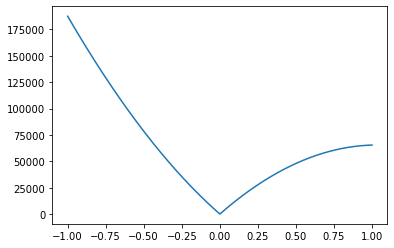

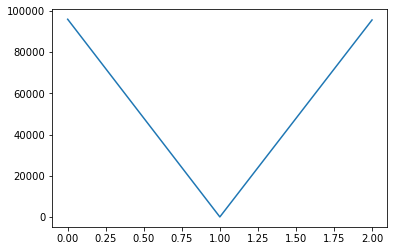

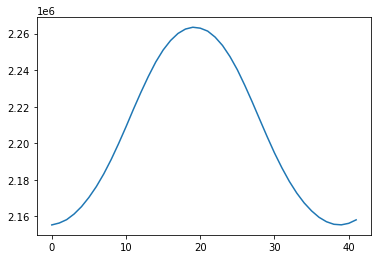

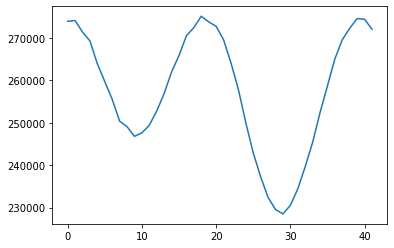

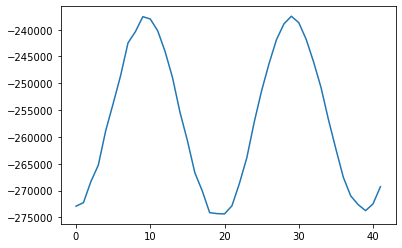

In [130]:
def quadratic(x, x_n, a, b, c):
    return np.abs(a * (x - x_n)**2 + b * (x - x_n))

xs = np.linspace(0, 1, 1000)
x_n = 0.5

plt.plot(xs * 2 - 1, quadratic(xs, x_n, og.I_2s[12], og.I_1s[12], og.I_0s[12]))

plt.show()

plt.plot(og.sads[20][21:24])
plt.show()

plt.plot(og.I_0s)
plt.show()

plt.plot(og.I_1s)
plt.show()

plt.plot(og.I_2s)
plt.show()